### Problem Description:
Describe the problem here...

# Lab 4. Probabilistic Inference
# Task 4.3 Monty Hall Problem Using Bayesian Network
## Problem Descriptions
There is 3 doors labbeled 1, 2, and 3 respectively leading to 3 prizes.  The prives are given as goat, goat, car relevant to the door numbers.  There is two persons involved in the game which is the show host and the challenger"player".  The player has a chance to win the car if he chooses the correct door or a goat if not.  let P represent prize.  

Sample size at this point P(goat, goat, car) = 3.  If the player chooses door 1 initially without knowing what is behind this door and the game show host chooses door 2 revealing a goat.  Now the player is given the opportunity to remain with his first choice that is door 1 or switch and choose door 3.  At this point knowing that the sample size has changed P(goat, car) = 2, what is the probability value if he now swtiches door and chooses door number 3.  

Rules -
1. The host must always open a door that was not picked by the contestant.(in this case D2).
2. The host must always open a door to reveal a goat and never the car.(D2)
3. The host must always offer the chance to switch between the originally chosen
door and the remaining closed door

###Solution using Bayesian Theorem

  *  Indexing door numbers for contestant 1 - 3 with values C1, C2, C3.
  *  Contestant sample space - Prize p = (C1,C2, C3) for prize behind the three doors.
  *  Sample space (goat1, goat2, car).
  *  Prior Probability p(C1) = P(C2) = P(C3) = 1/3
  *  Indexing door numbers for Game show host 1 - 3 with values D1, D2, D3.
  *  Game show host initial sample space - Prize p = (D1, D2, D3) for prize behind the three doors.
  *  Sample space (D2, D3) = 2.
  *  D2 = the game show host opens door number 2 to reveal the goat.
  
Using those infor we cannow calculate the solution-
To answer the problem question - what is the probability value if he now swtiches door and chooses door number 3?
  *  P(C3|D2) = ?
Using Bayesian Theorem we can write the soluion as
  *  P(C3|D2) = P(D2|C3).P(C3)/P(D2)
  *  P(D2|C3) = 1
  *  P(D2|C3) = 1/3
Using the Law of total probability we can calculate P(D2)
  *  P(D2) = P(D2|C1).C1 + P(D2|C2).P(C2) + P(D2|C3).P(C3)
  *  P(D2|C1) = 1/2
  *  P(D2|C2) = 0, given car is behind door number 2
  *  P(D2|C3) = 1, since goat is behind door number 3 game show host would choose this door.

###Results
  *  P(D2|C3).P(C3) = 1 . 1/3 = 1/3
  *  P(D2) = P(D2|C1).C1 + P(D2|C2).P(C2) + P(D2|C3).P(C3)
  *  P(D2) = 1/2.1/3 + 0.1/3 + 1.1/3 = 1/2
  *  P(C3|D2) = P(D2|C3).P(C3)/P(D2)
  *  P(C3|D2) = (1/3).(1/2) = 2/3

### Solution using Bayesian Network
  *  Doors 1-3 is index relevant to position 0-2.
  *  Let P represent prize, hence, prize P(0, 1, 2) = to sample size of 3
  *  P(P=0) = P(P=1) = P(P=2) = 1/3...Prior Probability
  *  Contestant C(0, 1, 2) also equal to the sample size of 3 which is the same value as prio probability.
  *  Contestant initial choice C(C=0) = C(C=1) = C(C=2)
  *  Host action H(1, 2, 3) is dependent upon 2 condition-
    *  Where the prize is(P) and the initial choice(C) of contestant.  
  *  The conditional probability of H given P and C is

### Probability of choosing door by host(Conditional Probability)


Lifted from "Quantum inferring acausal structures and the Monty
Hall problem. - D.Kurzyk, A.Glos"




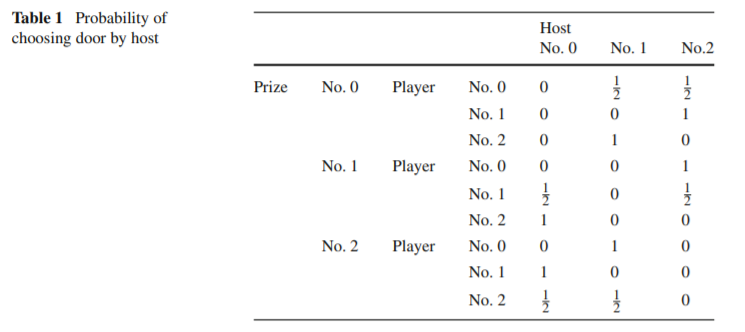

##Implementationa nd Results

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

     |████████████████████████████████| 1.9 MB 14.9 MB/s 


In [ ]:
# Defining the network structure
model = BayesianModel([('Contestant', 'Host'), ('Prize', 'Host')])

# Defining the CPDs:
cpd_c = TabularCPD('Contestant', 3, [[1/3], [1/3], [1/3]])
cpd_p = TabularCPD('Prize', 3, [[1/3], [1/3], [1/3]])
cpd_h = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                               [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                               [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Contestant', 'Prize'], evidence_card=[3, 3])

# cpd_c = TabularCPD('Contestant', 4, [[0.25], [0.25], [0.25], [0.25]])
# cpd_p = TabularCPD('Prize', 4, [[0.25], [0.25], [0.25], [0.25]])
# cpd_h = TabularCPD('Host', 4, [[0,   0,    0,    0,    0,    1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3], 
#                                [1/3, 0,    0.5,  0.5,  0,    0,   0,    0,    0.5,  0,    1/3, 0.5,  0.5,  0,    0.5,  1/3], 
#                                [1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0.5,  0,    0,    0,   0,    0.5,  0.5,  0,    1/3], 
#                                [1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0,    0,    0,    0]],
#                   evidence=['Contestant', 'Prize'], evidence_card=[4, 4])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)


/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
# Infering the posterior probability 
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(variables=['Prize'], evidence={'Contestant': 0, 'Host': 2}, show_progress=False, joint=False)
print(posterior['Prize'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+----------+--------------+
| Prize    |   phi(Prize) |
+==========+==============+
| Prize(0) |       0.3333 |
+----------+--------------+
| Prize(1) |       0.6667 |
+----------+--------------+
| Prize(2) |       0.0000 |
+----------+--------------+


## Discussions

In this task, We buitl a Bayesian Model to solve the above mention problem.  Both the mathemamtical solution work by hand and the modle solution had the same results.  This shows that it is possible to build a machine learning algorithm to solve probababilist inference problems. This model investigated the impact of vaibale change on a given problem and the results showed it to be very significant.  As new information arises variable change ust be re-caulculated in order to adequately asses the probelm and provide a realsit solution based upon mathematical  priciples of the Bayesian Law.   
